In [9]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }</style>"))


# IMPORTS

In [10]:
import os
if 'examples' in os.getcwd():
    os.chdir('..')
print(os.getcwd())    
import numpy as np
import matplotlib.pyplot as plt


print("All libraries loaded successfully!")
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

E:\ALL_PHD_MATERIALS\CODES\dLDS_OOP
All libraries loaded successfully!


# files

In [46]:
from importlib import reload
from dlds import *
import dlds
dlds = reload(dlds)
from dlds import *

In [48]:
from dlds import Direct_dLDS, dLDS_config
import dlds.vis


In [49]:
from dlds.vis import *

from synthetic import generate_dlds_synthetic_data

# multiple trials

In [59]:
def example_multiple_trials():
    """Example: Fit dLDS to multiple trials with shared dynamics."""
    print("\n" + "=" * 60)
    print("Example 2: Multiple Trials (Variable Length)")
    print("=" * 60)
    
    latent_dim = 3
    num_subdyns = 5
    
    # Generate multiple trials with different lengths
    trials = []
    for i, T in enumerate([70, 150, 80]):
        x, _, _ = generate_dlds_synthetic_data(
            latent_dim=latent_dim,
            T=T,
            num_subdyns=num_subdyns,
            noise_std=0.02,
            seed=100 + i, structured='lorenz',
        )
        trials.append(x)
        print("Trial %d shape: %s" % (i, x.shape))
    
    # Fit model
    model = Direct_dLDS(
        num_subdyns=num_subdyns,
        step_f=25.0,
        max_iter=250,
        verbose=1, num_no_change_thresh = 10
    )
    
    result = model.fit(trials)
    
    # Reconstruct all trials
    reconstructions = model.reconstruct(trials)
    
    print("\nReconstruction MSE per trial:")
    for i, (x_orig, x_hat) in enumerate(zip(trials, reconstructions)):
        mse = np.mean((x_orig - x_hat) ** 2)
        print("  Trial %d: %.6f" % (i, mse))
    
    return model, result,trials


# run

In [60]:
model2, result2 , x = example_multiple_trials()


Example 2: Multiple Trials (Variable Length)
Trial 0 shape: (3, 70)
Trial 1 shape: (3, 150)
Trial 2 shape: (3, 80)
Direct_dLDS Fitting
Number of trials: 3
Trial lengths: [70, 150, 80]
Latent dimension: 3
Number of dynamics operators (M): 5
Solver: spgl1
Regularization (τ): 0.1
Max error threshold: 14.104788
------------------------------------------------------------


Fitting:   5%| | 13/250 [00:05<02:06,  1.87it/s, error=393.449936, step_f=0.0000

Fitting:   6%| | 14/250 [00:06<02:49,  1.39it/s, error=344.624387, step_f=0.0000

Restoring best iterate to objective 18.81893314409889


Fitting:   6%| | 15/250 [00:07<03:26,  1.14it/s, error=296.262477, step_f=0.0000

Restoring best iterate to objective 14.580446996484559
Restoring best iterate to objective 14.700242130267439
Restoring best iterate to objective 21.708202640574736
Restoring best iterate to objective 6.887908040622879
Restoring best iterate to objective 5.547329352763568
Restoring best iterate to objective 4.288076778338271
Restoring best iterate to objective 17.19450382962245
Restoring best iterate to objective 19.129367466322474


Fitting:   6%| | 16/250 [00:08<04:01,  1.03s/it, error=255.208113, step_f=0.0000

Restoring best iterate to objective 21.850589154218227
Restoring best iterate to objective 11.69431930057863
Restoring best iterate to objective 2.8784330265574076
Restoring best iterate to objective 12.310503996898992


Fitting:   7%| | 17/250 [00:10<04:22,  1.12s/it, error=221.645842, step_f=0.0000

Restoring best iterate to objective 14.605074099743174
Restoring best iterate to objective 14.79647450631698
Restoring best iterate to objective 0.5327636789653684
Restoring best iterate to objective 16.240187243573747


Fitting:   7%| | 18/250 [00:11<04:44,  1.22s/it, error=195.631216, step_f=0.0000

Restoring best iterate to objective 14.399148098878511
Restoring best iterate to objective 14.085648457011981
Restoring best iterate to objective 9.735327547125573
Restoring best iterate to objective 9.993797739051907
Restoring best iterate to objective 17.764497764692408
Restoring best iterate to objective 12.254824311087315
Restoring best iterate to objective 12.763416503870658


Fitting:   8%| | 19/250 [00:13<05:15,  1.37s/it, error=175.428108, step_f=0.0000

Restoring best iterate to objective 14.08182547874129
Restoring best iterate to objective 10.165545370657943
Restoring best iterate to objective 16.231036708800108
Restoring best iterate to objective 5.8169983895112285
Restoring best iterate to objective 11.69373610309872
Restoring best iterate to objective 10.005057421433865
Restoring best iterate to objective 4.296936600739793
Restoring best iterate to objective 4.251141109659282
Restoring best iterate to objective 7.467428239945706
Restoring best iterate to objective 6.481486811434508
Restoring best iterate to objective 16.503429299578762
Restoring best iterate to objective 16.62900338804678
Restoring best iterate to objective 16.716003176088837


Fitting:   8%| | 20/250 [00:15<05:41,  1.48s/it, error=158.795547, step_f=0.0000

Restoring best iterate to objective 13.354710407157013
Restoring best iterate to objective 13.423778413425628
Restoring best iterate to objective 13.557056309910635
Restoring best iterate to objective 13.654669726700133
Restoring best iterate to objective 13.947079186901046
Restoring best iterate to objective 14.028155890555896
Restoring best iterate to objective 13.98971513041218
Restoring best iterate to objective 11.667159368465043
Restoring best iterate to objective 8.874910464602259
Restoring best iterate to objective 21.40951223943242
Restoring best iterate to objective 21.091926563870384
Restoring best iterate to objective 15.337031308372913
Restoring best iterate to objective 19.437326394264762
Restoring best iterate to objective 19.695236760121254
Restoring best iterate to objective 17.74208391090115
Restoring best iterate to objective 5.45578176524297
Restoring best iterate to objective 10.561796880182733
Restoring best iterate to objective 1.8449693584336553
Restoring best i

Fitting:   8%| | 21/250 [00:16<05:57,  1.56s/it, error=144.929379, step_f=0.0000

Restoring best iterate to objective 13.4369000835648
Restoring best iterate to objective 14.280963012628977
Restoring best iterate to objective 14.74618602806593
Restoring best iterate to objective 18.82911857116617
Restoring best iterate to objective 10.955733815445887
Restoring best iterate to objective 10.73708283835584
Restoring best iterate to objective 5.556436283485613
Restoring best iterate to objective 4.5746059048867425
Restoring best iterate to objective 2.133476436315489
Restoring best iterate to objective 1.7256607324364979
Restoring best iterate to objective 6.492826422056897
Restoring best iterate to objective 12.660109311313777
Restoring best iterate to objective 11.159380067927028
Restoring best iterate to objective 7.4582724776543605
Restoring best iterate to objective 16.5284612778894
Restoring best iterate to objective 16.566251192464286
Restoring best iterate to objective 13.757604182227352
Restoring best iterate to objective 12.89903962393934
Restoring best iterat

Fitting:   9%| | 22/250 [00:18<06:27,  1.70s/it, error=133.032794, step_f=0.0000

Restoring best iterate to objective 11.708078968443044
Restoring best iterate to objective 11.913197722005817
Restoring best iterate to objective 11.950367278196317
Restoring best iterate to objective 12.000746957306228
Restoring best iterate to objective 12.082484083733661
Restoring best iterate to objective 12.69177891499663
Restoring best iterate to objective 12.76905735551935
Restoring best iterate to objective 12.984216860140608
Restoring best iterate to objective 13.075691035056087
Restoring best iterate to objective 11.98835182503875
Restoring best iterate to objective 11.128645809154424
Restoring best iterate to objective 20.721415912401998
Restoring best iterate to objective 20.352242515854794
Restoring best iterate to objective 9.891378279751482
Restoring best iterate to objective 9.784633359198258
Restoring best iterate to objective 13.111869792624633
Restoring best iterate to objective 13.563988191437307
Restoring best iterate to objective 17.80688680934901
Restoring best i

Fitting:   9%| | 23/250 [00:20<06:42,  1.77s/it, error=123.333609, step_f=0.0000

Restoring best iterate to objective 11.302307824784945
Restoring best iterate to objective 11.645116513090246
Restoring best iterate to objective 12.24117481168012
Restoring best iterate to objective 12.43579848569835
Restoring best iterate to objective 12.6754364329906
Restoring best iterate to objective 12.736238736101086
Restoring best iterate to objective 7.066971633208427
Restoring best iterate to objective 14.632579808681063
Restoring best iterate to objective 20.156629874751378
Restoring best iterate to objective 17.874498236594363
Restoring best iterate to objective 10.311120121331767
Restoring best iterate to objective 12.477197591680767
Restoring best iterate to objective 12.886128902209826
Restoring best iterate to objective 13.37426020518107
Restoring best iterate to objective 13.580417644191124
Restoring best iterate to objective 16.382669130209447
Restoring best iterate to objective 18.15311982092945
Restoring best iterate to objective 0.8862738620742386
Restoring best it

Fitting:  10%| | 24/250 [00:22<06:53,  1.83s/it, error=114.550521, step_f=0.0000

Restoring best iterate to objective 10.961704072830688
Restoring best iterate to objective 11.174568985262061
Restoring best iterate to objective 11.452098509468975
Restoring best iterate to objective 11.516942262919816
Restoring best iterate to objective 12.704133895286686
Restoring best iterate to objective 12.554131645326247
Restoring best iterate to objective 8.849702079116305
Restoring best iterate to objective 8.089597868598723
Restoring best iterate to objective 13.633744017565135
Restoring best iterate to objective 12.374209087482312
Restoring best iterate to objective 13.653910148307897
Restoring best iterate to objective 13.695936083231508
Restoring best iterate to objective 15.914550097667084
Restoring best iterate to objective 15.963043923488831
Restoring best iterate to objective 16.577467356906244
Restoring best iterate to objective 16.835100221694844
Restoring best iterate to objective 17.114741819148207
Restoring best iterate to objective 17.431287871379666
Restoring be

Fitting:  10%| | 25/250 [00:24<07:13,  1.93s/it, error=106.702719, step_f=0.0000

Restoring best iterate to objective 10.48925845029647
Restoring best iterate to objective 10.74126705265258
Restoring best iterate to objective 10.708737880285325
Restoring best iterate to objective 11.017633906852591
Restoring best iterate to objective 11.114069634149274
Restoring best iterate to objective 11.580723172116453
Restoring best iterate to objective 12.09510054281223
Restoring best iterate to objective 12.369744184150541
Restoring best iterate to objective 12.399595770394226
Restoring best iterate to objective 5.27618173288996
Restoring best iterate to objective 19.049263227858724
Restoring best iterate to objective 13.278066573418654
Restoring best iterate to objective 15.292151158526748
Restoring best iterate to objective 16.830718381892027
Restoring best iterate to objective 1.4278842747082068
Restoring best iterate to objective 4.302296621811089
Restoring best iterate to objective 2.974438458358503
Restoring best iterate to objective 5.069307451818012
Restoring best ite

Fitting:  10%| | 26/250 [00:26<07:17,  1.95s/it, error=99.088143, step_f=0.0000]

Restoring best iterate to objective 10.129528677420694
Restoring best iterate to objective 10.27143841332285
Restoring best iterate to objective 10.310646283728861
Restoring best iterate to objective 11.83551544941676
Restoring best iterate to objective 11.961618295366144
Restoring best iterate to objective 11.93904216907721
Restoring best iterate to objective 10.581489892072717
Restoring best iterate to objective 3.363492734659702
Restoring best iterate to objective 7.8157744105904206
Restoring best iterate to objective 16.672841357592958
Restoring best iterate to objective 7.765762417196437
Restoring best iterate to objective 13.291686678083947
Restoring best iterate to objective 11.592693766504784
Restoring best iterate to objective 14.70792976513334
Restoring best iterate to objective 15.552099748007464
Restoring best iterate to objective 16.766048725523724
Restoring best iterate to objective 16.67846081817875
Restoring best iterate to objective 15.86985770893944
Restoring best ite

Fitting:  11%| | 27/250 [00:28<07:15,  1.95s/it, error=91.966183, step_f=0.0000]

Restoring best iterate to objective 9.782377258632241
Restoring best iterate to objective 9.855637189861376
Restoring best iterate to objective 9.951732698528554
Restoring best iterate to objective 10.037667301272561
Restoring best iterate to objective 10.18550675029638
Restoring best iterate to objective 10.3545755175065
Restoring best iterate to objective 10.456615749822623
Restoring best iterate to objective 10.395001835164498
Restoring best iterate to objective 10.634709097510544
Restoring best iterate to objective 11.742316104963336
Restoring best iterate to objective 11.852328117941736
Restoring best iterate to objective 7.610726700335764
Restoring best iterate to objective 4.156499499399892
Restoring best iterate to objective 1.0705647922480497
Restoring best iterate to objective 17.816286218582828
Restoring best iterate to objective 11.140222409341915
Restoring best iterate to objective 8.772202501178322
Restoring best iterate to objective 10.28998184084148
Restoring best itera

Fitting:  11%| | 28/250 [00:31<07:44,  2.09s/it, error=85.610011, step_f=0.0000]

Restoring best iterate to objective 9.43272343640195
Restoring best iterate to objective 9.507629063945616
Restoring best iterate to objective 9.780904122572581
Restoring best iterate to objective 9.83410329436434
Restoring best iterate to objective 9.922789831683628
Restoring best iterate to objective 10.083904480410945
Restoring best iterate to objective 10.116186964787282
Restoring best iterate to objective 11.069370726254864
Restoring best iterate to objective 11.185264322613756
Restoring best iterate to objective 11.396450633257643
Restoring best iterate to objective 11.391100465728389
Restoring best iterate to objective 7.19999352555131
Restoring best iterate to objective 9.503026960173482
Restoring best iterate to objective 17.20979711609285
Restoring best iterate to objective 12.869638635637896
Restoring best iterate to objective 8.479394085939523
Restoring best iterate to objective 10.020196275496096
Restoring best iterate to objective 11.931539903295192
Restoring best iterate

Fitting:  12%| | 29/250 [00:33<07:48,  2.12s/it, error=79.838142, step_f=0.0000]

Restoring best iterate to objective 9.314876078640703
Restoring best iterate to objective 9.416340983789349
Restoring best iterate to objective 9.76122429916569
Restoring best iterate to objective 9.931422008368608
Restoring best iterate to objective 9.973286663363131
Restoring best iterate to objective 10.761592179607565
Restoring best iterate to objective 11.041391935760476
Restoring best iterate to objective 5.450770846311758
Restoring best iterate to objective 3.8674830803890083
Restoring best iterate to objective 2.5917927281527193
Restoring best iterate to objective 15.26256272963418
Restoring best iterate to objective 7.738586488604752
Restoring best iterate to objective 11.654282983173808
Restoring best iterate to objective 15.15633972763882
Restoring best iterate to objective 15.328190077848031
Restoring best iterate to objective 15.506202785974336
Restoring best iterate to objective 11.901972340328742
Restoring best iterate to objective 1.3886696855110006
Restoring best itera

Fitting:  12%| | 30/250 [00:35<07:41,  2.10s/it, error=74.338642, step_f=0.0000]

Restoring best iterate to objective 8.744200161150147
Restoring best iterate to objective 8.8726918281767
Restoring best iterate to objective 9.148661840846536
Restoring best iterate to objective 9.110203869886352
Restoring best iterate to objective 9.544087370288452
Restoring best iterate to objective 9.615992611808004
Restoring best iterate to objective 9.806547402919067
Restoring best iterate to objective 8.069945804910565
Restoring best iterate to objective 6.781735954296269
Restoring best iterate to objective 3.7059697866148573
Restoring best iterate to objective 7.391668796151381
Restoring best iterate to objective 16.011507514572482
Restoring best iterate to objective 11.69411882233355
Restoring best iterate to objective 12.860926093717516
Restoring best iterate to objective 12.718341664431927
Restoring best iterate to objective 13.19515789818675
Restoring best iterate to objective 15.106818775853686
Restoring best iterate to objective 14.953212744574104
Restoring best iterate t

Fitting:  12%| | 31/250 [00:37<07:44,  2.12s/it, error=68.609508, step_f=0.0000]

Restoring best iterate to objective 8.711872341082168
Restoring best iterate to objective 9.259298984286975
Restoring best iterate to objective 9.451592265766992
Restoring best iterate to objective 9.721688735421031
Restoring best iterate to objective 10.026359713646082
Restoring best iterate to objective 10.532417497933746
Restoring best iterate to objective 10.521357185465362
Restoring best iterate to objective 9.172362363887187
Restoring best iterate to objective 6.2305005274987595
Restoring best iterate to objective 2.6011961174374774
Restoring best iterate to objective 2.931370934867132
Restoring best iterate to objective 6.567894957085343
Restoring best iterate to objective 9.979535885038178
Restoring best iterate to objective 14.377363529484555
Restoring best iterate to objective 5.4397797990644685
Restoring best iterate to objective 7.055394906188237
Restoring best iterate to objective 9.285278036627373
Restoring best iterate to objective 11.055425303311717
Restoring best itera

Fitting:  13%|▏| 32/250 [00:39<07:31,  2.07s/it, error=64.244884, step_f=0.0000]

Restoring best iterate to objective 7.745544477679657
Restoring best iterate to objective 7.710083931018098
Restoring best iterate to objective 7.89074612297549
Restoring best iterate to objective 8.105163366889212
Restoring best iterate to objective 8.046839161043623
Restoring best iterate to objective 8.234753587362599
Restoring best iterate to objective 8.31436296869347
Restoring best iterate to objective 8.447926416135711
Restoring best iterate to objective 8.906516849310425
Restoring best iterate to objective 8.910804317557718
Restoring best iterate to objective 8.870199417256385
Restoring best iterate to objective 9.284073710061532
Restoring best iterate to objective 9.726614135774373
Restoring best iterate to objective 9.83507207847172
Restoring best iterate to objective 10.31387598321335
Restoring best iterate to objective 10.184816533306863
Restoring best iterate to objective 10.141076951863202
Restoring best iterate to objective 6.262252974090977
Restoring best iterate to obj

Fitting:  13%|▏| 33/250 [00:41<07:31,  2.08s/it, error=60.098953, step_f=0.0000]

Restoring best iterate to objective 7.342366628857206
Restoring best iterate to objective 7.5587228988901956
Restoring best iterate to objective 7.489687503524172
Restoring best iterate to objective 8.06862274378235
Restoring best iterate to objective 8.254596559565766
Restoring best iterate to objective 8.227224813096122
Restoring best iterate to objective 8.211368858870113
Restoring best iterate to objective 8.486480014557296
Restoring best iterate to objective 8.732935546146459
Restoring best iterate to objective 8.791054485413111
Restoring best iterate to objective 8.916490390466933
Restoring best iterate to objective 9.944538592356619
Restoring best iterate to objective 9.984621198658491
Restoring best iterate to objective 9.843248184608512
Restoring best iterate to objective 10.006270463914587
Restoring best iterate to objective 8.607360336996255
Restoring best iterate to objective 1.0326771786033857
Restoring best iterate to objective 8.156469921867615
Restoring best iterate to 

Fitting:  14%|▏| 34/250 [00:44<08:08,  2.26s/it, error=56.177433, step_f=0.0000]

Restoring best iterate to objective 7.497950066624195
Restoring best iterate to objective 7.922397959044487
Restoring best iterate to objective 8.101127276654472
Restoring best iterate to objective 8.085577985527838
Restoring best iterate to objective 8.660101337359773
Restoring best iterate to objective 8.687118530730842
Restoring best iterate to objective 9.068070096021112
Restoring best iterate to objective 1.2720191911347578
Restoring best iterate to objective 0.3080271698421938
Restoring best iterate to objective 3.475452348462148
Restoring best iterate to objective 7.245106835438506
Restoring best iterate to objective 4.528651330533716
Restoring best iterate to objective 11.532962678601974
Restoring best iterate to objective 10.53595474065684
Restoring best iterate to objective 13.349659874783288
Restoring best iterate to objective 12.693646232658347
Restoring best iterate to objective 9.012958016639441
Restoring best iterate to objective 0.8722004978682107
Restoring best iterate

Fitting:  14%|▏| 35/250 [00:46<08:07,  2.27s/it, error=52.090994, step_f=0.0000]

Restoring best iterate to objective 7.331183381775593
Restoring best iterate to objective 7.521968840627191
Restoring best iterate to objective 7.282647087441541
Restoring best iterate to objective 7.516832618712077
Restoring best iterate to objective 8.333733173532645
Restoring best iterate to objective 8.757021692563129
Restoring best iterate to objective 9.267813919674177
Restoring best iterate to objective 9.333401774418801
Restoring best iterate to objective 8.044357710294952
Restoring best iterate to objective 0.04993220092338686
Restoring best iterate to objective 10.047632103913223
Restoring best iterate to objective 13.187647915131809
Restoring best iterate to objective 12.74523533781487
Restoring best iterate to objective 9.432260351679195
Restoring best iterate to objective 7.397585273200581
Restoring best iterate to objective 12.300115431181249
Restoring best iterate to objective 13.051397099357144
Restoring best iterate to objective 13.237294604443164
Restoring best iterat

Fitting:  14%|▏| 36/250 [00:48<07:49,  2.19s/it, error=49.060616, step_f=0.0000]

Restoring best iterate to objective 7.088513022956348
Restoring best iterate to objective 7.2556572874291465
Restoring best iterate to objective 7.015218406660348
Restoring best iterate to objective 8.448619379228699
Restoring best iterate to objective 8.534423547665918
Restoring best iterate to objective 8.203931900196054
Restoring best iterate to objective 8.556459776714634
Restoring best iterate to objective 8.667943091959033
Restoring best iterate to objective 8.782184354465493
Restoring best iterate to objective 9.03070367931026
Restoring best iterate to objective 1.5694214668344322
Restoring best iterate to objective 0.5168688591658094
Restoring best iterate to objective 0.02037995027808588
Restoring best iterate to objective 2.453392580396885
Restoring best iterate to objective 6.07223058366369
Restoring best iterate to objective 15.49635031997146
Restoring best iterate to objective 12.362329074031527
Restoring best iterate to objective 7.195404920855076
Restoring best iterate t

Fitting:  15%|▏| 37/250 [00:50<07:39,  2.16s/it, error=45.263489, step_f=0.0000]

Restoring best iterate to objective 6.839416116264642
Restoring best iterate to objective 6.932876895798432
Restoring best iterate to objective 7.933060356613281
Restoring best iterate to objective 8.04427201764184
Restoring best iterate to objective 8.426686458359407
Restoring best iterate to objective 8.42752778066222
Restoring best iterate to objective 7.501364698613167
Restoring best iterate to objective 0.14610419759261434
Restoring best iterate to objective 0.08062246023868079
Restoring best iterate to objective 1.8205622259810128
Restoring best iterate to objective 5.494935859719634
Restoring best iterate to objective 8.869232884819366
Restoring best iterate to objective 12.280699113879454
Restoring best iterate to objective 10.625980642734401
Restoring best iterate to objective 11.598807256572375
Restoring best iterate to objective 0.13814244702888975
Restoring best iterate to objective 7.579519991657847
Restoring best iterate to objective 1.4443640337547987
Restoring best iter

Fitting:  15%|▏| 38/250 [00:52<07:40,  2.17s/it, error=41.918370, step_f=0.0000]

Restoring best iterate to objective 5.869433191146928
Restoring best iterate to objective 5.9833388004701655
Restoring best iterate to objective 6.19963699470857
Restoring best iterate to objective 6.741131187635345
Restoring best iterate to objective 7.67533640721746
Restoring best iterate to objective 8.496230200504737
Restoring best iterate to objective 8.232106725070459
Restoring best iterate to objective 7.22271112068219
Restoring best iterate to objective 0.47139186187290766
Restoring best iterate to objective 4.61059338150134
Restoring best iterate to objective 7.6599304478494235
Restoring best iterate to objective 11.788789628616748
Restoring best iterate to objective 12.168926443025644
Restoring best iterate to objective 11.780431194262352
Restoring best iterate to objective 10.683181840714422
Restoring best iterate to objective 7.730287835736284
Restoring best iterate to objective 0.007999049536287559
Restoring best iterate to objective 3.980164510902023
Restoring best iterat

Fitting:  16%|▏| 39/250 [00:55<07:36,  2.16s/it, error=38.721100, step_f=0.0000]

Restoring best iterate to objective 5.8343884981723555
Restoring best iterate to objective 5.944249299517989
Restoring best iterate to objective 5.943843157513303
Restoring best iterate to objective 6.572270325675659
Restoring best iterate to objective 7.857437791281903
Restoring best iterate to objective 7.3548392337473425
Restoring best iterate to objective 8.23396675630281
Restoring best iterate to objective 8.221538216401363
Restoring best iterate to objective 0.0655897884788447
Restoring best iterate to objective 4.2870604221834485
Restoring best iterate to objective 11.410001731820469
Restoring best iterate to objective 11.712854336221827
Restoring best iterate to objective 0.004985383899834936
Restoring best iterate to objective 8.069808701929404
Restoring best iterate to objective 5.591475703843578
Restoring best iterate to objective 5.897456428860818
Restoring best iterate to objective 4.970912284542468
Restoring best iterate to objective 3.8141463032878695
Restoring best iter

Fitting:  16%|▏| 40/250 [00:57<07:31,  2.15s/it, error=36.145418, step_f=0.0000]

Restoring best iterate to objective 5.448075550050235
Restoring best iterate to objective 5.60274969069178
Restoring best iterate to objective 6.221613812110934
Restoring best iterate to objective 7.646116254069262
Restoring best iterate to objective 7.700152583791516
Restoring best iterate to objective 6.740122176156517
Restoring best iterate to objective 3.432798875902383
Restoring best iterate to objective 11.033084799022554
Restoring best iterate to objective 11.294084918388068
Restoring best iterate to objective 10.94166929036031
Restoring best iterate to objective 10.384620405549596
Restoring best iterate to objective 0.004359340165666359
Restoring best iterate to objective 0.005686168250820812
Restoring best iterate to objective 6.8896720669387665
Restoring best iterate to objective 5.2008528792352
Restoring best iterate to objective 4.957329150310336
Restoring best iterate to objective 4.642252067338532
Restoring best iterate to objective 4.186435255094592
Restoring best iterat

Fitting:  16%|▏| 41/250 [00:59<07:19,  2.10s/it, error=33.732653, step_f=0.0000]

Restoring best iterate to objective 4.975870325437713
Restoring best iterate to objective 7.817251447852724
Restoring best iterate to objective 7.644303307110023
Restoring best iterate to objective 7.419435888349664
Restoring best iterate to objective 7.669096860048329
Restoring best iterate to objective 0.23511234504007383
Restoring best iterate to objective 5.9367664757052445
Restoring best iterate to objective 8.455228948035392
Restoring best iterate to objective 10.750107524465294
Restoring best iterate to objective 10.871743056342046
Restoring best iterate to objective 10.360304139468562
Restoring best iterate to objective 0.0056883506128465305
Restoring best iterate to objective 2.1613011866782625
Restoring best iterate to objective 6.390087163915819
Restoring best iterate to objective 5.252777634465118
Restoring best iterate to objective 4.184498066180583
Restoring best iterate to objective 3.869063847871136
Restoring best iterate to objective 0.0013857426286323655
Restoring bes

Fitting:  17%|▏| 42/250 [01:01<07:10,  2.07s/it, error=31.484982, step_f=0.0000]

Restoring best iterate to objective 4.462776629244487
Restoring best iterate to objective 6.776018802663573
Restoring best iterate to objective 7.43659023828038
Restoring best iterate to objective 6.865735578067533
Restoring best iterate to objective 7.415253247443287
Restoring best iterate to objective 7.809991594630773
Restoring best iterate to objective 7.034393779210412
Restoring best iterate to objective 0.053174650012601264
Restoring best iterate to objective 1.7354986440416105
Restoring best iterate to objective 6.471981893526699
Restoring best iterate to objective 7.945177570389552
Restoring best iterate to objective 7.992501009251238
Restoring best iterate to objective 9.789415581264572
Restoring best iterate to objective 9.991313906591676
Restoring best iterate to objective 10.20116329985691
Restoring best iterate to objective 10.696570824788832
Restoring best iterate to objective 0.009492546389400674
Restoring best iterate to objective 5.203184278709708
Restoring best iterat

Fitting:  17%|▏| 43/250 [01:03<07:20,  2.13s/it, error=30.071764, step_f=0.0000]

Restoring best iterate to objective 6.128174456485829
Restoring best iterate to objective 6.486938250796337
Restoring best iterate to objective 6.543749681473989
Restoring best iterate to objective 7.401687862319614
Restoring best iterate to objective 7.336413115502756
Restoring best iterate to objective 7.1854807914800505
Restoring best iterate to objective 7.705188820435334
Restoring best iterate to objective 0.04560732366993085
Restoring best iterate to objective 0.03725242378248118
Restoring best iterate to objective 7.660346062203929
Restoring best iterate to objective 6.571464425885909
Restoring best iterate to objective 9.166966928549655
Restoring best iterate to objective 9.337207620303229
Restoring best iterate to objective 9.56932857616396
Restoring best iterate to objective 10.048028521130938
Restoring best iterate to objective 9.915098636677715
Restoring best iterate to objective 10.27353848360504
Restoring best iterate to objective 9.726978707291744
Restoring best iterate 

Fitting:  18%|▏| 44/250 [01:05<07:08,  2.08s/it, error=28.061044, step_f=0.0000]

Restoring best iterate to objective 5.956040588742034
Restoring best iterate to objective 6.489036361858763
Restoring best iterate to objective 6.475451842212816
Restoring best iterate to objective 6.1953355190930575
Restoring best iterate to objective 6.762258404169718
Restoring best iterate to objective 7.130258261059983
Restoring best iterate to objective 6.959390365483537
Restoring best iterate to objective 7.012639582410533
Restoring best iterate to objective 4.148192740362692
Restoring best iterate to objective 0.20377044811818107
Restoring best iterate to objective 9.786370363911331
Restoring best iterate to objective 10.092746990261917
Restoring best iterate to objective 8.417518017332043
Restoring best iterate to objective 6.638661216444777
Restoring best iterate to objective 9.389417972069324
Restoring best iterate to objective 9.349046015164545
Restoring best iterate to objective 9.588093108910545
Restoring best iterate to objective 9.71861747173111
Restoring best iterate to

Fitting:  18%|▏| 45/250 [01:08<07:38,  2.24s/it, error=26.481516, step_f=0.0000]

Restoring best iterate to objective 5.262475200984147
Restoring best iterate to objective 5.645813653517624
Restoring best iterate to objective 6.487629368221245
Restoring best iterate to objective 7.846152086350058
Restoring best iterate to objective 6.940040117678142
Restoring best iterate to objective 6.958514875561754
Restoring best iterate to objective 6.262958125140445
Restoring best iterate to objective 3.952303501636345
Restoring best iterate to objective 0.006398988796966002
Restoring best iterate to objective 0.010367825229148203
Restoring best iterate to objective 9.269734618984442
Restoring best iterate to objective 9.279574122741746
Restoring best iterate to objective 11.335625415885913
Restoring best iterate to objective 10.068382197083286
Restoring best iterate to objective 8.518596848664103
Restoring best iterate to objective 8.380433997722967
Restoring best iterate to objective 8.896416058302895
Restoring best iterate to objective 9.13925031901929
Restoring best iterat

Fitting:  18%|▏| 46/250 [01:10<07:47,  2.29s/it, error=25.806426, step_f=0.0000]

Restoring best iterate to objective 2.621089269948386
Restoring best iterate to objective 2.790419635159898
Restoring best iterate to objective 2.935793918715275
Restoring best iterate to objective 3.1076556106446795
Restoring best iterate to objective 4.557325276710313
Restoring best iterate to objective 5.161077531447564
Restoring best iterate to objective 5.462886001987774
Restoring best iterate to objective 6.913899558465631
Restoring best iterate to objective 7.119939252525237
Restoring best iterate to objective 6.738407092833959
Restoring best iterate to objective 4.997386877210677
Restoring best iterate to objective 0.02102424827389608
Restoring best iterate to objective 2.479567414476994
Restoring best iterate to objective 8.958459460780459
Restoring best iterate to objective 12.654023386842582
Restoring best iterate to objective 9.994747358752024
Restoring best iterate to objective 8.664543743153661
Restoring best iterate to objective 7.22542373984238
Restoring best iterate to

Fitting:  19%|▏| 47/250 [01:12<07:42,  2.28s/it, error=23.884400, step_f=0.0000]

Restoring best iterate to objective 2.0949411918871976
Restoring best iterate to objective 2.235314327527938
Restoring best iterate to objective 2.416880170195097
Restoring best iterate to objective 2.562412643432467
Restoring best iterate to objective 2.7344224793016907
Restoring best iterate to objective 2.8408748592476716
Restoring best iterate to objective 3.756095321319905
Restoring best iterate to objective 4.030398187626364
Restoring best iterate to objective 4.442284878777166
Restoring best iterate to objective 5.368210480238364
Restoring best iterate to objective 6.369352343918411
Restoring best iterate to objective 6.208193160880245
Restoring best iterate to objective 6.057389016829746
Restoring best iterate to objective 6.87731114678863
Restoring best iterate to objective 7.022052949312641
Restoring best iterate to objective 5.715572160729174
Restoring best iterate to objective 4.731244451892199
Restoring best iterate to objective 3.3633869726455523
Restoring best iterate to

Fitting:  19%|▏| 48/250 [01:14<07:27,  2.21s/it, error=21.556090, step_f=0.0000]

Restoring best iterate to objective 2.6285098940007874
Restoring best iterate to objective 2.4860276963705004
Restoring best iterate to objective 2.084524424673352
Restoring best iterate to objective 2.2010393951974816
Restoring best iterate to objective 2.3575187473227146
Restoring best iterate to objective 2.463805408980005
Restoring best iterate to objective 2.805560154969854
Restoring best iterate to objective 3.0237826187102517
Restoring best iterate to objective 3.3169466857997576
Restoring best iterate to objective 3.6231207632361633
Restoring best iterate to objective 6.290601284849303
Restoring best iterate to objective 7.675420417343982
Restoring best iterate to objective 5.432595263791242
Restoring best iterate to objective 4.4408978966802914
Restoring best iterate to objective 3.076272497917418
Restoring best iterate to objective 0.04921725557962973
Restoring best iterate to objective 11.19586431805669
Restoring best iterate to objective 12.732312767637147
Restoring best it

Fitting:  20%|▏| 49/250 [01:17<07:29,  2.24s/it, error=20.044340, step_f=0.0000]

Restoring best iterate to objective 3.963515486818406
Restoring best iterate to objective 3.41634521322788
Restoring best iterate to objective 3.2191982157959482
Restoring best iterate to objective 5.1579397786052406
Restoring best iterate to objective 6.667805933555181
Restoring best iterate to objective 4.746887673909538
Restoring best iterate to objective 6.558963080499185
Restoring best iterate to objective 7.6837964783145045
Restoring best iterate to objective 6.3712967018315245
Restoring best iterate to objective 5.381241022904634
Restoring best iterate to objective 6.0061922525643805
Restoring best iterate to objective 5.185523723074121
Restoring best iterate to objective 0.06294828258886784
Restoring best iterate to objective 0.7258678684588209
Restoring best iterate to objective 8.983283810620918
Restoring best iterate to objective 13.011700349336678
Restoring best iterate to objective 8.172233536450939
Restoring best iterate to objective 7.092209657438341
Restoring best itera

Fitting:  20%|▏| 50/250 [01:19<07:35,  2.28s/it, error=18.939238, step_f=0.0000]

Restoring best iterate to objective 4.212242050839732
Restoring best iterate to objective 4.4670767567871
Restoring best iterate to objective 3.3500590279923212
Restoring best iterate to objective 3.7004504076915485
Restoring best iterate to objective 4.286492526720469
Restoring best iterate to objective 5.64580529283352
Restoring best iterate to objective 4.535187012612934
Restoring best iterate to objective 3.72493274037714
Restoring best iterate to objective 4.984755380130824
Restoring best iterate to objective 7.4324813061835675
Restoring best iterate to objective 7.100978649672
Restoring best iterate to objective 7.4558646327265565
Restoring best iterate to objective 6.006588163035381
Restoring best iterate to objective 5.044634724995915
Restoring best iterate to objective 0.07527797269887952
Restoring best iterate to objective 0.14471008377173464
Restoring best iterate to objective 7.202726790374649
Restoring best iterate to objective 10.14200309456051
Restoring best iterate to o

Fitting:  20%|▏| 51/250 [01:22<08:00,  2.41s/it, error=19.025307, step_f=0.0000]

Restoring best iterate to objective 3.090634783621781
Restoring best iterate to objective 3.6540239590725307
Restoring best iterate to objective 1.9577122792861756
Restoring best iterate to objective 2.2924594003194714
Restoring best iterate to objective 2.5576655740971983
Restoring best iterate to objective 2.835833195633229
Restoring best iterate to objective 3.333742043162214
Restoring best iterate to objective 4.058267127845549
Restoring best iterate to objective 4.904483886233168
Restoring best iterate to objective 5.691775326603312
Restoring best iterate to objective 3.9288126826368526
Restoring best iterate to objective 4.311936595728611
Restoring best iterate to objective 4.690592173208995
Restoring best iterate to objective 4.9484369620945365
Restoring best iterate to objective 5.556830251300197
Restoring best iterate to objective 6.118183839090307
Restoring best iterate to objective 4.880127480280163
Restoring best iterate to objective 1.8262301181468619
Restoring best iterat

Fitting:  21%|▏| 52/250 [01:24<07:35,  2.30s/it, error=19.165427, step_f=0.0000]

Restoring best iterate to objective 2.966236008935559
Restoring best iterate to objective 3.267971139527539
Restoring best iterate to objective 0.48650931861314894
Restoring best iterate to objective 0.6998593312076253
Restoring best iterate to objective 0.9733591527929276
Restoring best iterate to objective 1.1209038054078815
Restoring best iterate to objective 1.4093658324399083
Restoring best iterate to objective 1.6090582357513061
Restoring best iterate to objective 1.7923859983631687
Restoring best iterate to objective 2.163080297140275
Restoring best iterate to objective 2.7809523161887246
Restoring best iterate to objective 3.533467591889575
Restoring best iterate to objective 5.090056392040543
Restoring best iterate to objective 4.16943994053627
Restoring best iterate to objective 3.3559696074477507
Restoring best iterate to objective 5.009174759434821
Restoring best iterate to objective 5.599673593884138
Restoring best iterate to objective 5.170317303468591
Restoring best iter

Fitting:  21%|▏| 53/250 [01:26<07:31,  2.29s/it, error=18.504666, step_f=0.0000]

Restoring best iterate to objective 0.8100347752859831
Restoring best iterate to objective 0.8316914125119166
Restoring best iterate to objective 0.8950486895060681
Restoring best iterate to objective 0.9410189614126199
Restoring best iterate to objective 1.0829848412807603
Restoring best iterate to objective 1.1989103078457979
Restoring best iterate to objective 1.4103798753355983
Restoring best iterate to objective 1.7106243959716716
Restoring best iterate to objective 1.96521469617213
Restoring best iterate to objective 2.041038253798368
Restoring best iterate to objective 2.1286578011380337
Restoring best iterate to objective 3.3758624270663757
Restoring best iterate to objective 5.51004800337396
Restoring best iterate to objective 4.1860993378781295
Restoring best iterate to objective 3.4021601746813492
Restoring best iterate to objective 4.399239753600106
Restoring best iterate to objective 4.81605923430953
Restoring best iterate to objective 5.004060601172892
Restoring best iter

Fitting:  22%|▏| 54/250 [01:28<07:08,  2.19s/it, error=17.923767, step_f=0.0000]

Restoring best iterate to objective 3.080105753161549
Restoring best iterate to objective 3.1291547640837516
Restoring best iterate to objective 3.0785848208067277
Restoring best iterate to objective 2.8251905787518568
Restoring best iterate to objective 3.585304557428718
Restoring best iterate to objective 5.385826200107491
Restoring best iterate to objective 5.3704275366835565
Restoring best iterate to objective 4.080699226938032
Restoring best iterate to objective 5.062645351063086
Restoring best iterate to objective 4.982092151078648
Restoring best iterate to objective 4.24231906347433
Restoring best iterate to objective 2.776527173547255
Restoring best iterate to objective 0.08869925019001687
Restoring best iterate to objective 0.07023067677710991
Restoring best iterate to objective 0.2664413251129751
Restoring best iterate to objective 3.154764003368482
Restoring best iterate to objective 2.0459752867694987
Restoring best iterate to objective 0.2835924892275983
Restoring best ite

Fitting:  22%|▏| 55/250 [01:30<06:54,  2.13s/it, error=17.322703, step_f=0.0000]

Restoring best iterate to objective 0.2934567619535227
Restoring best iterate to objective 0.3746487051203994
Restoring best iterate to objective 0.4963818235671636
Restoring best iterate to objective 0.6703319221587412
Restoring best iterate to objective 0.8953070433346837
Restoring best iterate to objective 4.183457854611282
Restoring best iterate to objective 3.769059203107318
Restoring best iterate to objective 3.22067986906396
Restoring best iterate to objective 5.260618507383761
Restoring best iterate to objective 4.715800911494405
Restoring best iterate to objective 5.547628321456829
Restoring best iterate to objective 5.625935188075355
Restoring best iterate to objective 5.494475843897225
Restoring best iterate to objective 4.040032506465993
Restoring best iterate to objective 2.550491156289564
Restoring best iterate to objective 0.6768770387833748
Restoring best iterate to objective 0.13996050612596622
Restoring best iterate to objective 0.12323599274291734
Restoring best iter

Fitting:  22%|▏| 56/250 [01:32<06:43,  2.08s/it, error=16.848578, step_f=0.0000]

Restoring best iterate to objective 0.4639331184078483
Restoring best iterate to objective 0.5059495880430107
Restoring best iterate to objective 0.49967755681431036
Restoring best iterate to objective 0.5342071450792537
Restoring best iterate to objective 0.5724687901067651
Restoring best iterate to objective 0.6921622459742602
Restoring best iterate to objective 0.8548128042690496
Restoring best iterate to objective 1.1184020486731934
Restoring best iterate to objective 1.5821422565425167
Restoring best iterate to objective 4.765301616198836
Restoring best iterate to objective 3.9584065663764463
Restoring best iterate to objective 3.4121030383397994
Restoring best iterate to objective 5.723622820528864
Restoring best iterate to objective 3.496310802362855
Restoring best iterate to objective 4.062518516469793
Restoring best iterate to objective 3.532384884073664
Restoring best iterate to objective 3.6637567256133097
Restoring best iterate to objective 3.636951452368178
Restoring best 

Fitting:  23%|▏| 57/250 [01:34<06:29,  2.02s/it, error=14.212400, step_f=0.0000]

Restoring best iterate to objective 1.189888091809459
Restoring best iterate to objective 1.1820780464060454
Restoring best iterate to objective 1.2231574972519603
Restoring best iterate to objective 1.2338334520440766
Restoring best iterate to objective 1.3673334600663518
Restoring best iterate to objective 1.4338011846604015
Restoring best iterate to objective 1.6201830022372365
Restoring best iterate to objective 1.8882522576475504
Restoring best iterate to objective 2.1715911357615814
Restoring best iterate to objective 4.866320511236913
Restoring best iterate to objective 3.3141313772141783
Restoring best iterate to objective 2.7924558116385385
Restoring best iterate to objective 3.1435841104011084
Restoring best iterate to objective 3.2937735430372315
Restoring best iterate to objective 3.671700772602501
Restoring best iterate to objective 3.2451776988017027
Restoring best iterate to objective 5.884491882729234
Restoring best iterate to objective 4.32835201068294
Restoring best i

Fitting:  23%|▏| 57/250 [01:35<05:22,  1.67s/it, error=14.212400, step_f=0.0000]

Restoring best iterate to objective 4.979921232373091
Restoring best iterate to objective 4.351855079719147
Restoring best iterate to objective 2.4597500611798937
Restoring best iterate to objective 0.09923635619047524
Restoring best iterate to objective 0.12749503667797768
Restoring best iterate to objective 0.01846425400649024
Restoring best iterate to objective 1.7340462089337674
Restoring best iterate to objective 3.0508092530105673
Restoring best iterate to objective 6.8151311917251896

Converged at iteration 57 with error 12.888693
------------------------------------------------------------
Training converged.
Final error: 12.888693

To reconstruct data, call: x_hat = model.reconstruct(data)

Reconstruction MSE per trial:
  Trial 0: 5.561237
  Trial 1: 2.890061
  Trial 2: 5.664811


In [24]:
# Print a summary
result2.summary()

dLDS Fitting Results
Converged: False
Iterations: 100
--------------------------------------------------
Number of dynamics operators (M): 5
Latent dimension (p): 3
Number of trials: 3
Trial lengths: [30, 150, 80]
--------------------------------------------------
F shapes: [(3, 3), (3, 3), (3, 3), (3, 3), (3, 3)]
Coefficient shapes: [(5, 29), (5, 149), (5, 79)]


In [26]:
# Get the learned operators F
F_list = result2.F
print("Number of F matrices:", len(F_list))
print("Shape of each F:", F_list[0].shape)

Number of F matrices: 5
Shape of each F: (3, 3)


In [92]:
# Get the coefficients
coefficients = result2.dynamic_coefficients
c_trial0 = coefficients[0]  # coefficients for trial 0

print("Shape of coefficients:", c_trial0.shape)
print("This means: %d operators, %d time points" % (c_trial0.shape[0], c_trial0.shape[1]))

# Get the error history
errors = result2.error_history
print("Final error:", result2.final_error)

Shape of coefficients: (5, 69)
This means: 5 operators, 69 time points
Final error: 12.888693330427857


In [77]:
?model2.reconstruct

In [78]:
## Step 7: Reconstruct the data; Now let's use the model to reconstruct (predict) the data.
# If the model is good, the reconstruction should look like the original data.
x_hat  = []
for trial in x:
    # Reconstruct
    x_hat_now = model2.reconstruct(trial, to_smooth = True)
    x_hat.append(x_hat_now)

    # Calculate error
    mse = np.mean((trial - x_hat_now) ** 2)
    
    


Restoring best iterate to objective 3.900958280380644
Restoring best iterate to objective 3.8023787762867958
Restoring best iterate to objective 5.869313895437248
Restoring best iterate to objective 9.185321899421147
Restoring best iterate to objective 0.024143999110252213
Restoring best iterate to objective 0.08276805402799302
Restoring best iterate to objective 0.029352125187135706
Restoring best iterate to objective 5.3520923810437635
Restoring best iterate to objective 0.001711489582460529
Restoring best iterate to objective 0.017337689712735974
Restoring best iterate to objective 0.0041075710949364545
Restoring best iterate to objective 0.0048838434707694275
Restoring best iterate to objective 0.008771799872097629
Restoring best iterate to objective 0.10252347987154793
Restoring best iterate to objective 0.09272478612237772
Restoring best iterate to objective 0.31983639735616454
Restoring best iterate to objective 0.24005835104495554
Restoring best iterate to objective 0.394942067

## Step 8: Visualize everything
#Now let's make nice plots to understand the results.
### 8.1 Original vs Reconstructed

In [81]:
?plot_reconstruction

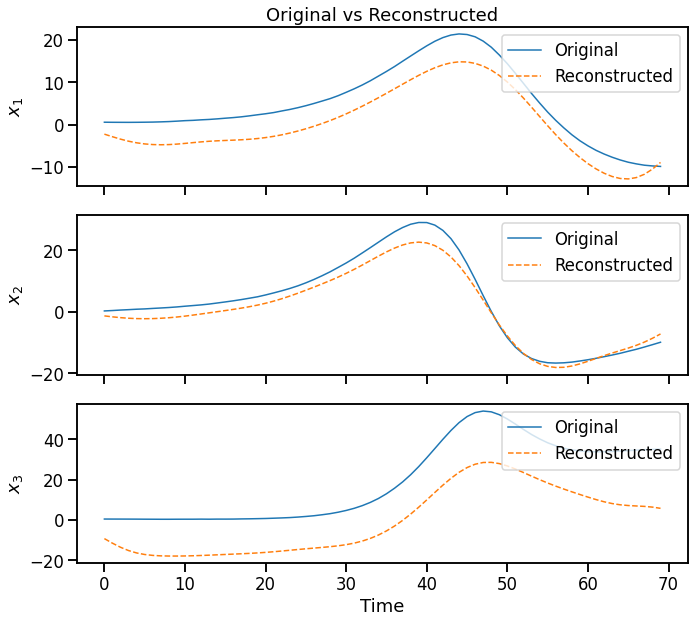

(<Figure size 720x648 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Original vs Reconstructed'}, ylabel='$x_{1}$'>,
        <AxesSubplot:ylabel='$x_{2}$'>,
        <AxesSubplot:xlabel='Time', ylabel='$x_{3}$'>], dtype=object))

In [79]:

# Plot original vs reconstructed
fig, axs = plt.subplots(3, len(x), fisize = (len(x)*5, 10))
plot_reconstruction(x[0], x_hat[0], dims=[0, 1, 2])


### 8.2 Training Error

# This shows how the error decreased during training.

### - The error should go down

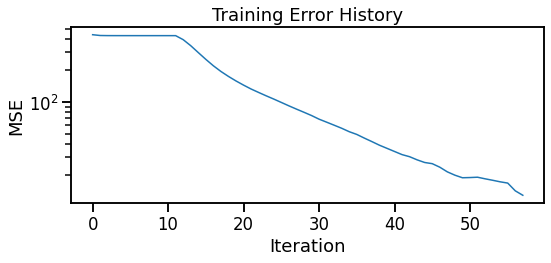

(<Figure size 576x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Training Error History'}, xlabel='Iteration', ylabel='MSE'>)

In [80]:


# Plot error history
plot_error_history(result2.error_history)


### 8.3 The Coefficients

The coefficients `c(t)` show which dynamics operator is active at each time.

- Each line is one operator
- High value = that operator is active
- Low value = that operator is not used

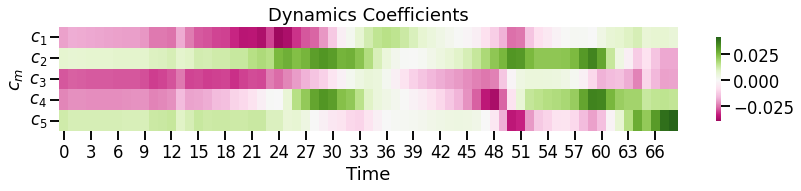

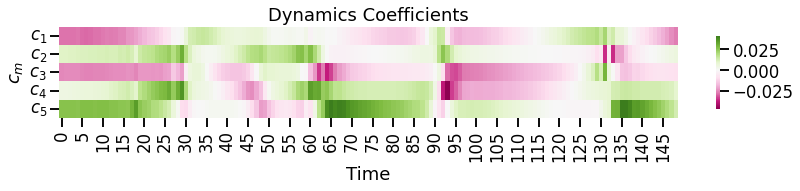

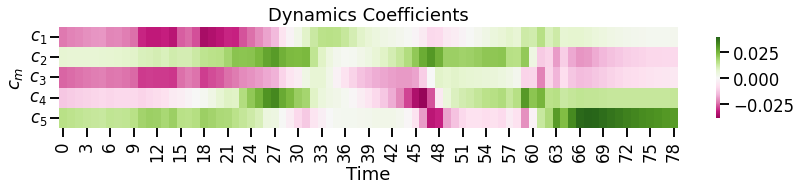

(<Figure size 864x216 with 2 Axes>,
 <AxesSubplot:title={'center':'Dynamics Coefficients'}, xlabel='Time', ylabel='$c_m$'>)

In [100]:
# Plot coefficients as heatmap
plot_coefficients_heatmap(result2.dynamic_coefficients, trial_idx=0)
plot_coefficients_heatmap(result2.dynamic_coefficients, trial_idx=1)
plot_coefficients_heatmap(result2.dynamic_coefficients, trial_idx=2)

### 8.4 The Dynamics Operators F

Each F matrix describes one type of dynamics (one "rule").

- Red = positive values
- Blue = negative values
- White = zero

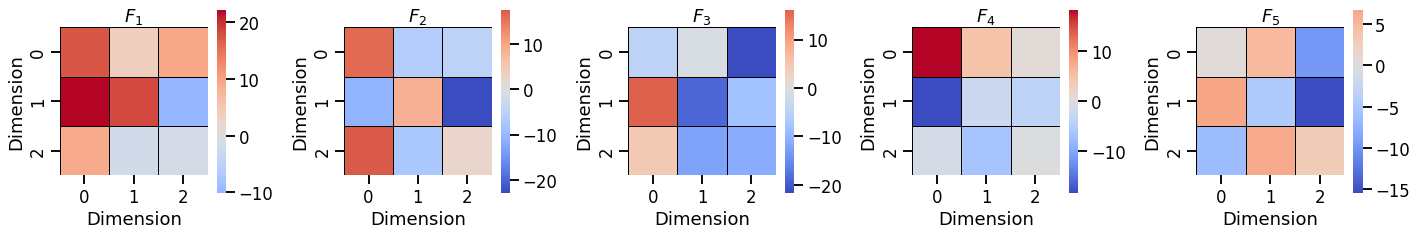

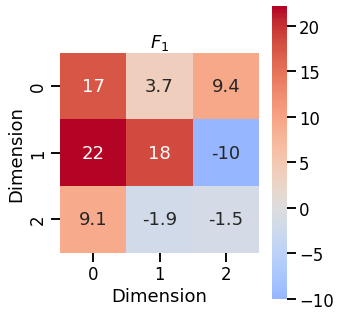

(<Figure size 360x360 with 2 Axes>,
 <AxesSubplot:title={'center':'$F_{1}$'}, xlabel='Dimension', ylabel='Dimension'>)

In [52]:
# Plot all f matrices
plot_f(result2.F)

# Plot just the first f
plot_single_F(result2.F[0], idx=0)

### 8.5 Trajectory Colored by Dominant Dynamics
## This is a cool plot! It shows the trajectory in 3D, with colors showing which dynamics operator is most active at each point.
### - Different colors = different dynamics
### - This helps you see where the dynamics change

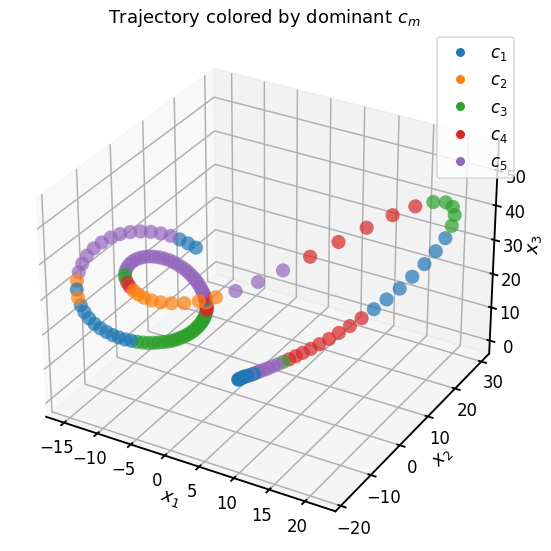

(<Figure size 576x576 with 1 Axes>,
 <Axes3DSubplot:title={'center':'Trajectory colored by dominant $c_m$'}, xlabel='$x_{1}$', ylabel='$x_{2}$'>)

In [96]:
# Plot trajectory colored by dominant dynamics
c_trial1 = coefficients[1]
plot_scatter_by_dominant_subdynamics(x[1], c_trial1)


### 8.6 3D Trajectory

In [64]:
from dlds.viz import *

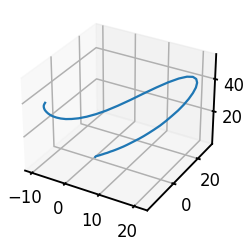

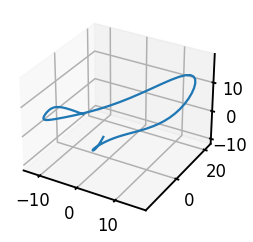

In [68]:
# Simple 3D trajectory plot
plot_3d(x[0])
plot_3d(gaussian_convolve(x_hat, direction = 1))

### 8.7 Combined Dynamics at a Specific Time

# At each time, the combined dynamics is:

# $$F_t = \sum_m c_{m,t} \cdot f_m$$

# Let's look at the combined F at time t=50.

# Get combined F

In [98]:
F_combined = result2.get_combined_F(trial_idx=0)
print("Shape of F_combined:", F_combined.shape)
print("This means: %d x %d matrix at each of %d time points" % F_combined.shape)

Shape of F_combined: (3, 3, 69)
This means: 3 x 3 matrix at each of 69 time points


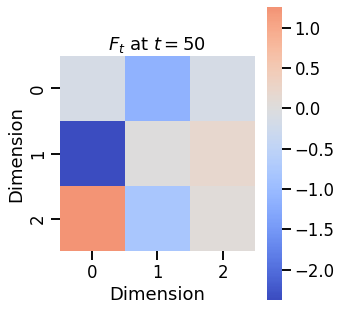

(<Figure size 360x360 with 2 Axes>,
 <AxesSubplot:title={'center':'$F_t$ at $t=50$'}, xlabel='Dimension', ylabel='Dimension'>)

In [99]:
# Plot at time t=50
plot_combined_F(F_combined, time_idx=50)
